In [9]:
from torchvision import datasets, models, transforms
import torch.nn as nn
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
data_dir = './data/'
model_dir = './models/'
input_size = 224 # Tamany d'imatge que utiliza Resnet
batch_size = 32

In [3]:
transform = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5098), (0.2212)) # mitjana, desviacio tipica
    ])

print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
images = datasets.ImageFolder(os.path.join(data_dir, 'custom'), transform)
# Create training and validation dataloaders
dataloader= torch.utils.data.DataLoader(images, batch_size=batch_size, shuffle=True, num_workers=4)

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Initializing Datasets and Dataloaders...


In [4]:
def init_model(num_classes, feature_extract, weights=None):
    model = models.resnet50(weights=weights)
    if feature_extract:
        for param in model.parameters():
            param.requires_grad = False
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)
    return model

In [5]:
model = init_model(num_classes=2, feature_extract=True, weights=models.ResNet50_Weights.DEFAULT)
model.load_state_dict(torch.load(os.path.join(model_dir, 'pretrained.pt')))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
inputs, classes = next(iter(dataloader))

model = model.to(device)
inputs = inputs.to(device)

outputs = model(inputs)
_, preds = torch.max(outputs, 1)
preds = preds.cpu().numpy()
classes = classes.numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

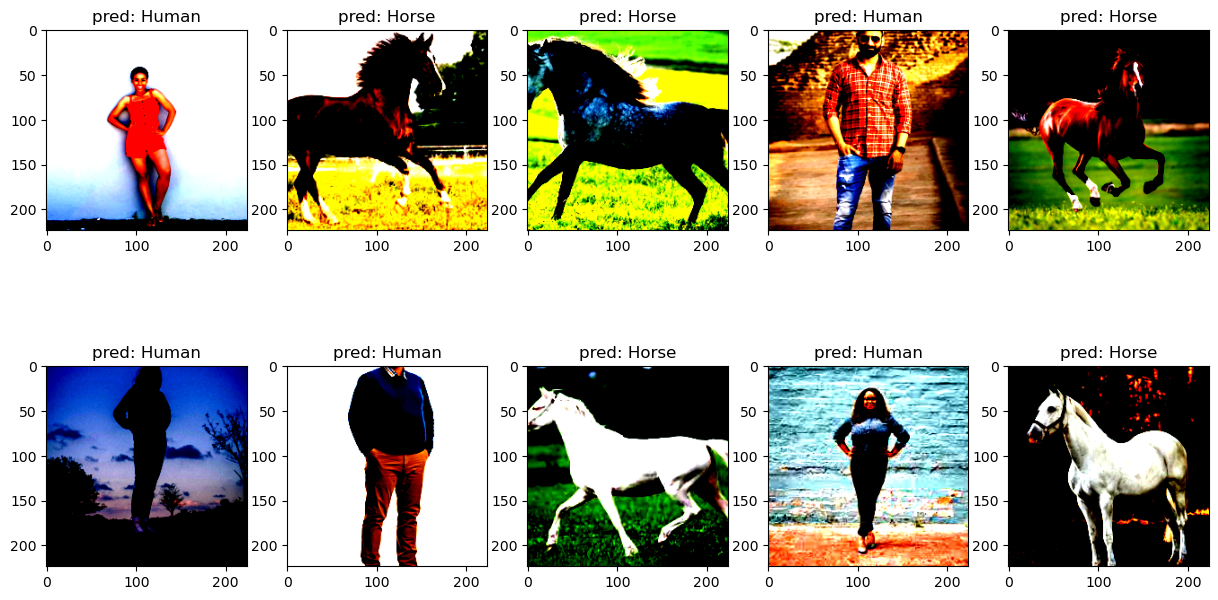

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(15, 8))

for i, input in enumerate(inputs):
    x = int(i/5)
    y = int(i%5)
    im_array = input.cpu().numpy()
    ax[x,y].set_title('pred: ' + ('Human' if classes[i] else 'Horse'))
    ax[x,y].imshow(np.transpose(im_array, (1,2,0)))
plt.show()

In [110]:
from PIL import Image
from matplotlib import cm

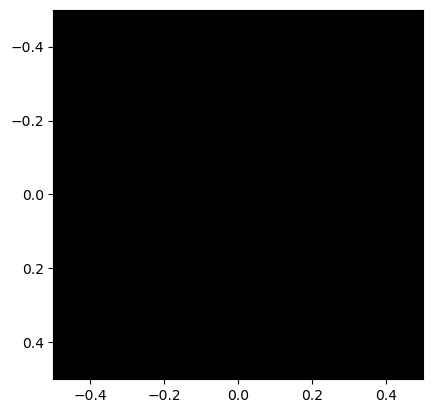

In [165]:
i = 0
def draw(outputs):
    global i
    im_array = outputs[0].detach().cpu().numpy()[0, :, :]
    
    plt.imshow(im_array, cmap='gray')
    plt.savefig('./images/' + str(i) + '.png')
    i += 1


with torch.no_grad():
    draw(inputs)
    
    x = model.conv1(inputs)
    draw(x)
    x = model.bn1(x)
    draw(x)
    x = model.relu(x)
    draw(x)
    x = model.maxpool(x)
    draw(x)
    x = model.layer1(x)
    draw(x)
    x = model.layer2(x)
    draw(x)
    x = model.layer3(x)
    draw(x)
    x = model.layer4(x)
    draw(x)
    x = model.avgpool(x)
    draw(x)
    
dir_path = './images/'
filenames = [path for path in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, path))]
images = []
for filename in filenames:
    im = Image.open(os.path.join(dir_path, filename))
    images.append(im)
frame_one = images[0]
frame_one.save('conv.gif', format="GIF", append_images=images, save_all=True, duration=600, loop=0)